<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/DALEX_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install libraries dulu
  # install.packages("randomForest")
  # install.packages("DALEX")
  # install.packages("caret")
  # install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
rm(list=ls())

# libraries
library(dplyr)
library(randomForest)
library(caret)
library(pROC)
library(DALEX)
library(e1071)

# load data
load("data2.rda")

# merapikan tipe variabel
  # saya copas langsung dari RMD kamu ya Cha
  data2$packaging_newness = as.integer(data2$packaging_newness)
  data2$technology_newness= as.integer(data2$technology_newness)
  data2$product_katpang_newness= as.integer(data2$product_katpang_newness)
  data2$market_newness= as.integer(data2$market_newness)
  data2$claim_newness= as.integer(data2$claim_newness)
  data2$departments_involved= as.integer(data2$departments_involved)
  data2$interdependence_of_processes= as.integer(data2$interdependence_of_processes)
  data2$no_of_task= as.integer(data2$no_of_task)
  data2$jumlah_bb_baru= as.integer(data2$jumlah_bb_baru)
  data2$jumlah_new_supplier= as.integer(data2$jumlah_new_supplier)
  data2$jumlah_jenis_btp= as.integer(data2$jumlah_jenis_btp)
  data2$claim_variation= as.integer(data2$claim_variation)

# cek struktur data
data2 %>% str()

tibble [98 × 32] (S3: tbl_df/tbl/data.frame)
 $ bentuk_produk                   : Factor w/ 4 levels "LIQUID","Powder",..: 2 2 2 2 2 2 1 4 2 2 ...
 $ tempat_produksi                 : Factor w/ 2 levels "Internal","Maklon": 1 1 1 1 1 1 2 2 1 1 ...
 $ daerah_produksi                 : Factor w/ 4 levels "Jabodetabek",..: 1 1 1 1 1 1 3 2 1 1 ...
 $ ada_tidak_bb_baru               : Factor w/ 2 levels "Ada","Tidak Ada": 2 1 1 1 1 1 1 1 1 1 ...
 $ jumlah_bb_baru                  : int [1:98] 0 1 1 2 2 1 1 2 2 1 ...
 $ jumlah_new_supplier             : int [1:98] 0 0 0 0 0 0 1 1 0 0 ...
 $ max_lead_time_bb                : num [1:98] 0 91 90 25 30 22 60 96 60 10 ...
 $ asal_bb_baru_terjauh            : Factor w/ 6 levels "Amerika","Asia",..: 6 2 4 4 4 4 2 1 2 4 ...
 $ tipe_kemasan                    : Factor w/ 4 levels "Offset","Offset Roto",..: 2 3 3 3 3 3 1 3 3 3 ...
 $ packaging_newness               : int [1:98] 1 1 1 1 1 1 1 4 1 1 ...
 $ jumlah_jenis_btp                : int [1:98] 4 

In [ ]:
# cek proporsi variabel target
cat("DATASET AWAL")
table(data2$rto_status)
prop.table(table(data2$rto_status))*100

# pecah jadi train dan test
set.seed(02062021)
data_1 = data2 %>% filter(rto_status == "ONTIME")
data_2 = data2 %>% filter(rto_status!= "ONTIME")

# train dataset
id_1 = sample(nrow(data_1),35,replace = F)
train_1 = data_1[id_1,]
id_2 = sample(nrow(data_2),35,replace = F)
train_2 = data_2[id_2,]
train = rbind(train_1,train_2)
cat("\n\n==========\nTRAIN")
table(train$rto_status)

# test dataset
test_1 = data_1[-id_1,]
test_2 = data_2[-id_2,]
test = rbind(test_1,test_2)
cat("\n\n==========\nTEST")
table(test$rto_status)

DATASET AWAL


 DELAY ONTIME 
    51     47 


   DELAY   ONTIME 
52.04082 47.95918 



TRAIN


 DELAY ONTIME 
    35     35 



TEST


 DELAY ONTIME 
    16     12 

In [ ]:
# saya bikin contoh untuk model random forest ya
model_rf = randomForest(rto_status~.,
                        data = train)

# isi dari modelnya
print(model_rf) 
importance(model_rf)


Call:
 randomForest(formula = rto_status ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 34.29%
Confusion matrix:
       DELAY ONTIME class.error
DELAY     21     14   0.4000000
ONTIME    10     25   0.2857143


,MeanDecreaseGini
bentuk_produk,0.988935621
tempat_produksi,0.339336741
daerah_produksi,0.163322306
ada_tidak_bb_baru,0.189219672
jumlah_bb_baru,1.193224334
jumlah_new_supplier,0.456749785
max_lead_time_bb,2.349861777
asal_bb_baru_terjauh,3.047338034
tipe_kemasan,1.084354346
packaging_newness,2.150502606


In [ ]:
# confusion matrix dengan test dataset
testPred = predict(model_rf, newdata=test, type = "response")
confusionMatrix(testPred,test$rto_status)

# cek nilai AUC
roc_obj = roc(as.numeric(test$rto_status), as.numeric(testPred))
cat("\n\n==========\nAUC")
auc(roc_obj)

Confusion Matrix and Statistics

          Reference
Prediction DELAY ONTIME
    DELAY     10      2
    ONTIME     6     10
                                          
               Accuracy : 0.7143          
                 95% CI : (0.5133, 0.8678)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.08893         
                                          
                  Kappa : 0.44            
                                          
 Mcnemar's Test P-Value : 0.28884         
                                          
            Sensitivity : 0.6250          
            Specificity : 0.8333          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.6250          
             Prevalence : 0.5714          
         Detection Rate : 0.3571          
   Detection Prevalence : 0.4286          
      Balanced Accuracy : 0.7292          
                                          
       'Positive' Class : DELAY           
               

Setting levels: control = 1, case = 2

Setting direction: controls < cases





AUC

Area under the curve: 0.7292

In [ ]:
# sekarang bagian DALEX-nya
# create explainer model
explainer_model = explain(model = model_rf,
                          data = test,
                          y = ifelse(test$rto_status == "DELAY",0,1), # ini part yang penting karena harus diubah dulu bentuk y alias targetnya
                          type = "classification",
                          label = "Random Forest",
                          colorize = FALSE)

Preparation of a new explainer is initiated
  -> model label       :  Random Forest 
  -> data              :  28  rows  32  cols 
  -> data              :  tibble converted into a data.frame 
  -> target variable   :  28  values 
  -> predict function  :  yhat.randomForest  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package randomForest , ver. 4.6.14 , task classification (  default  ) 
  -> model_info        :  type set to  classification 
  -> predicted values  :  numerical, min =  0.136 , mean =  0.4962857 , max =  0.882  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.882 , mean =  -0.06771429 , max =  0.782  
  A new explainer has been created!  


In [ ]:
# model explainer
performa_model = model_performance(explainer_model)
performa_model # kalau diperhatikan nilai akurasinya sama dengan yagn confusion matrix yah. Tapi AUC nya entah kenapa berbeza

Measures for:  classification
recall     : 0.8333333 
precision  : 0.625 
f1         : 0.7142857 
accuracy   : 0.7142857 
auc        : 0.671875

Residuals:
     0%     10%     20%     30%     40%     50%     60%     70%     80%     90% 
-0.8820 -0.7006 -0.5560 -0.3414 -0.2628 -0.1760  0.2236  0.3466  0.4264  0.4814 
   100% 
 0.7820 

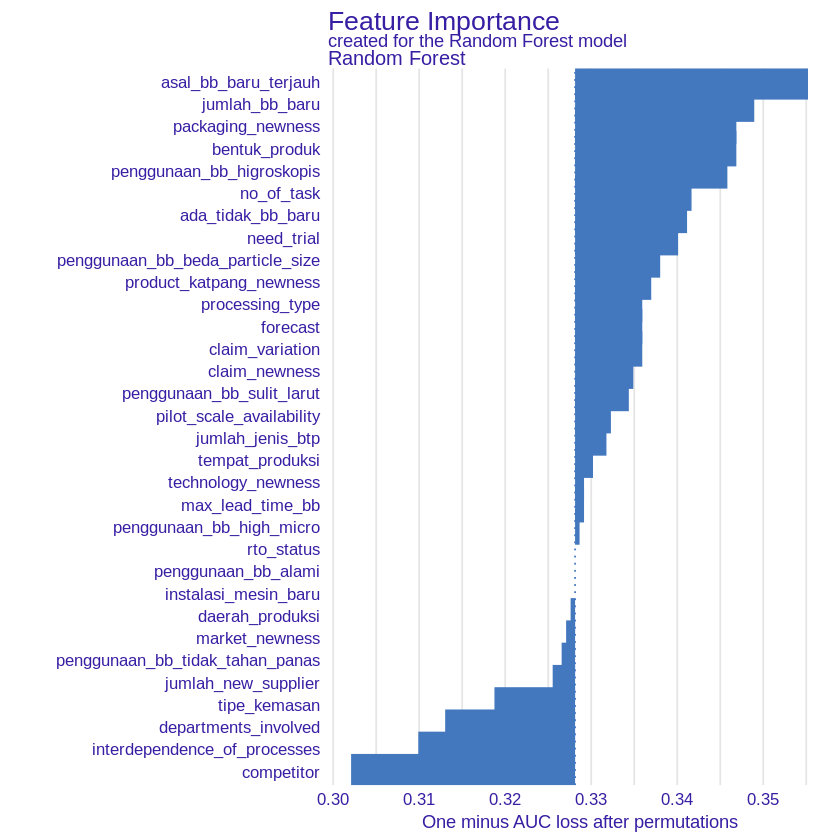

In [ ]:
# variable importance
var_importante = model_parts(explainer_model)
plot_importance = plot(var_importante,show_boxplots = F)
plot_importance

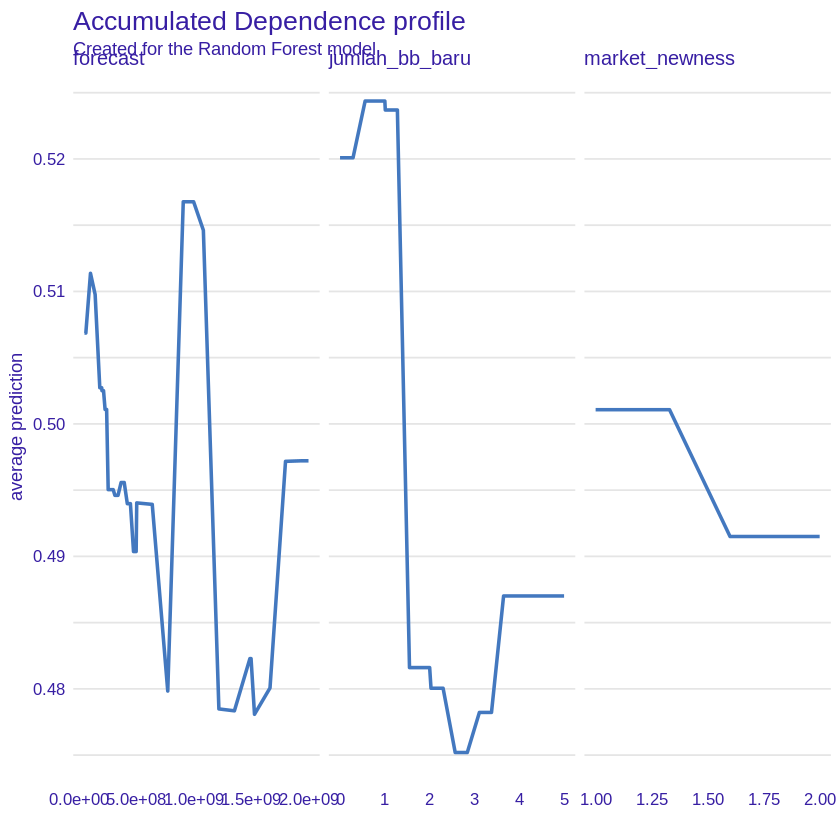

In [ ]:
# model profile
# ini sebagai contoh, saya pengen cek pengaruh dari beberapa variabel ini terhadap hasil akhir
# TAPI ini hanya bisa utk data bertipe numeric saja ya
mp_rf = model_profile(explainer_model, 
                      variable =  c("market_newness","forecast","jumlah_bb_baru"), 
                      type = "accumulated")

plot(mp_rf)

'variable_type' changed to 'categorical' due to lack of numerical variables.



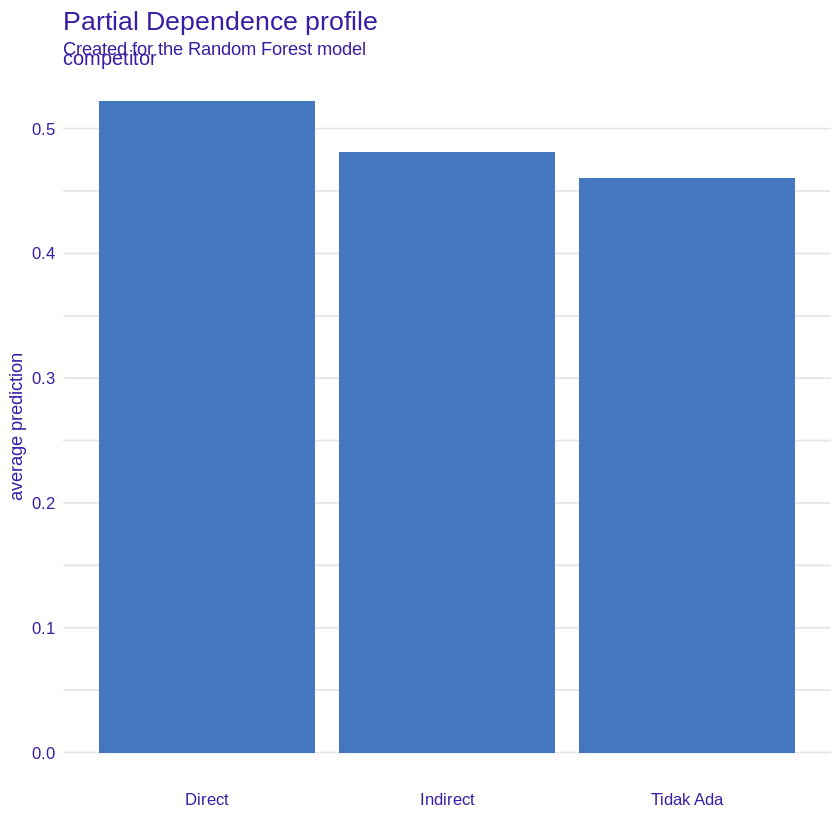

In [ ]:
# ini utk ngecek seberapa penting isi dari variabel competitor
tes = model_profile(explainer_model, "competitor", "partial_dependency")
plot(tes)

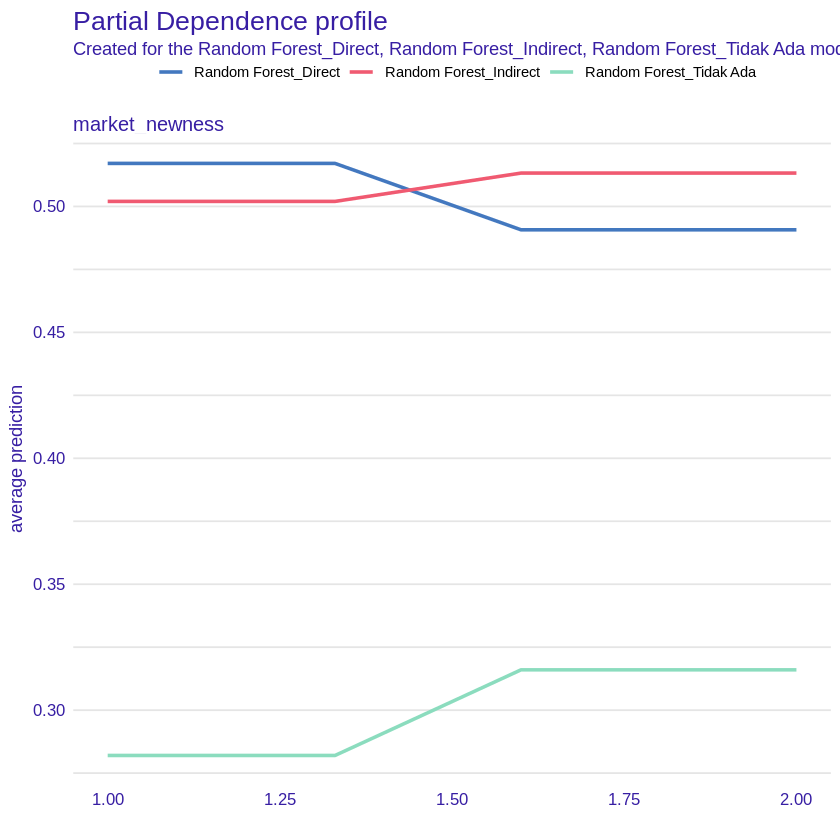

In [ ]:
# grouped partial-dependence profile
# ini utk bikin semacam crosstab variabel numerik ke yang non numerik
comp = model_profile(explainer = explainer_model, 
                     variables = "market_newness", groups = "competitor")

plot(comp)